#### **Using importlib method to use config.py file in all folders!**

In [369]:
import importlib.util
import os

# Define the path to config.py
config_path = os.path.abspath(os.path.join(os.path.dirname(r'C:\Users\nilay\OneDrive - Cal State Fullerton (1)\Desktop\NILAY-TO-JOB-DATA\SPRING 2024\CPSC 597 Project\Stock-Price-Prediction'), 'Stock-Price-Prediction', 'config.py'))

# Load the module from the specified path
spec = importlib.util.spec_from_file_location("config", config_path)
config = importlib.util.module_from_spec(spec)
spec.loader.exec_module(config)

### **Dataset Loading \ Preprocessing \ Splitting**

#### **Importing Required Libraries**

In [370]:
import pandas as pd     # this is to load the csv data
from matplotlib import pyplot as plt        # used for data visualization
import os       # this is mainly for working with system paths
import numpy as np

#### **Loading the CSV Dataset**

In [371]:
dataset_filepath = os.path.join(config.BASE_DIR, 'dataset', 'INFY.NS.csv')
data_frame = pd.read_csv(dataset_filepath)

In [372]:
# viewing the pandas data_frame
data_frame.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
894,1999-06-04,25.085938,25.195313,24.765625,25.000389,17.533106,12052608.0
444,1997-09-12,5.507812,5.737890,5.433593,5.641406,3.932545,6425600.0
3519,2009-09-24,292.500000,292.500000,282.493744,285.556244,221.456696,44169688.0
5032,2015-11-04,575.049988,578.799988,566.150024,568.400024,490.471588,3205572.0
5037,2015-11-13,549.974976,553.000000,545.000000,550.400024,474.939362,3520868.0


In [373]:
# taking significant features and dropping remaining features
data_frame = data_frame.drop(['Date'], axis=1)
data_frame.sample(5)

,Open,High,Low,Close,Adj Close,Volume
5602,575.500000,577.525024,567.174988,569.299988,517.117676,5083608.0
3329,140.000000,142.250000,136.256256,137.787506,105.979141,13738152.0
5299,485.024994,493.049988,485.024994,492.325012,434.382355,5941662.0
3531,286.000000,286.000000,276.375000,281.981262,218.684143,8163800.0
451,5.546875,5.815429,5.546875,5.746289,4.005657,6630400.0


In [374]:
# using sklearn MinMaxScaler for scaling values between [0 - 1]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_frame_scaled = scaler.fit_transform(data_frame.to_numpy())


data_frame_scaled = pd.DataFrame(data_frame_scaled, columns=[
    'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'
])

In [375]:
# viewing scaled data frame
data_frame_scaled.sample(5)

,Open,High,Low,Close,Adj Close,Volume
1691,0.027251,0.027096,0.027095,0.026997,0.019109,0.147067
6355,0.767405,0.763052,0.775313,0.761089,0.752991,0.027572
3530,0.153958,0.152235,0.156721,0.153269,0.118885,0.000000
5818,0.374709,0.373410,0.377072,0.374844,0.346969,0.044401
5533,0.262038,0.271132,0.265795,0.270913,0.246140,0.056712


In [376]:
# checking for null values and removing it
data_frame_scaled.dropna(inplace=True)

In [377]:
data_frame_scaled.sample(5)

,Open,High,Low,Close,Adj Close,Volume
1379,0.024236,0.023964,0.024695,0.024128,0.016943,0.000000
2389,0.076789,0.075929,0.075901,0.074430,0.054479,0.042515
3172,0.113326,0.116005,0.114175,0.115979,0.087290,0.066325
6115,0.358054,0.360594,0.355294,0.351785,0.339778,0.054862
6310,0.739747,0.753972,0.751738,0.755159,0.747126,0.074214


In [378]:
# saving the dataframe as csv to check for dataset properly if anything else is needed to clean
df_to_csv_file_path = os.path.join(config.BASE_DIR, 'dataset', 'df_to_csv_final.csv')
data_frame_scaled.to_csv(df_to_csv_file_path)

#### **Plotting the Data Frame Column**

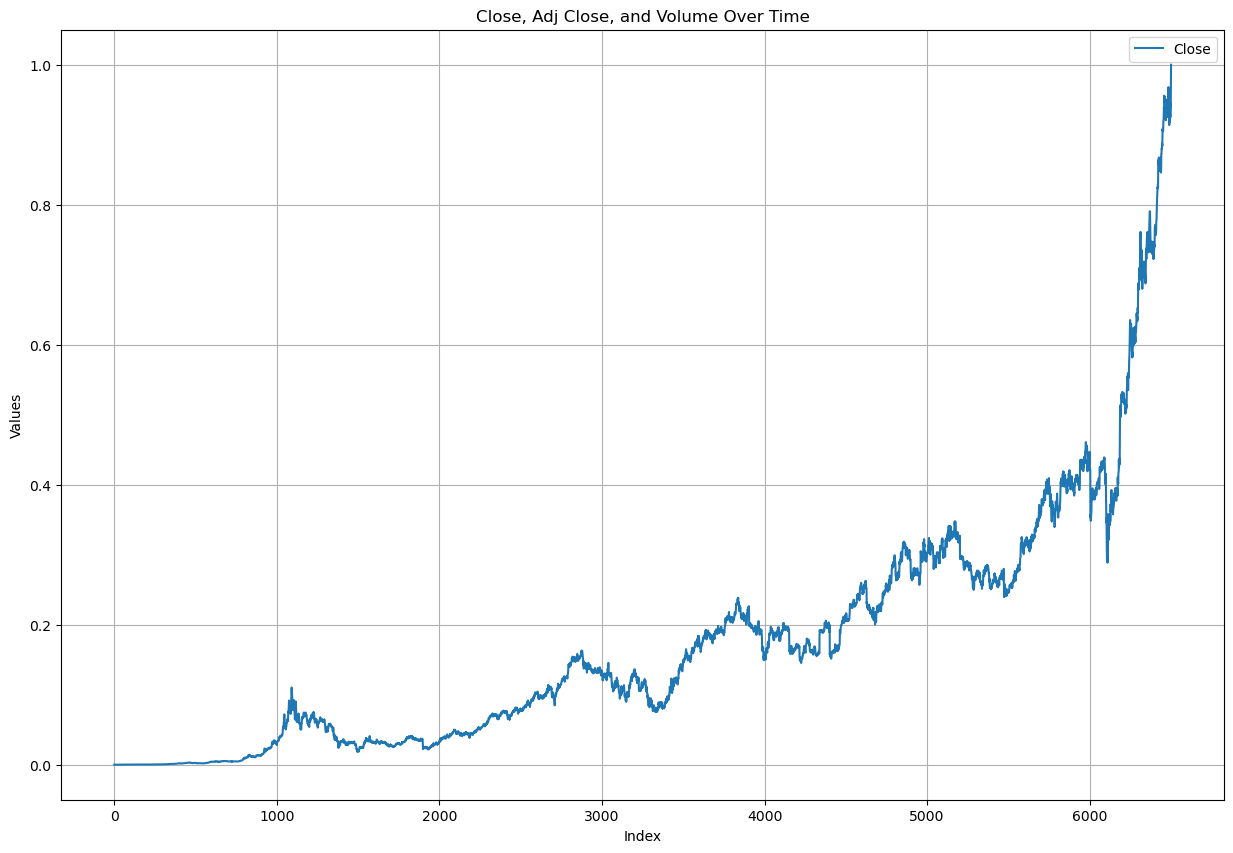

In [379]:
# Plotting the data for visualization
plt.figure(figsize=(15, 10))

# plt.plot(data_frame_scaled.index, data_frame_scaled['Open'], label='Open')
# plt.plot(data_frame_scaled.index, data_frame_scaled['High'], label='High')
# plt.plot(data_frame_scaled.index, data_frame_scaled['Low'], label='Low')
plt.plot(data_frame_scaled.index, data_frame_scaled['Close'], label='Close')
# plt.plot(data_frame_scaled.index, data_frame_scaled['Adj Close'], label='Adj Close')
# plt.plot(data_frame_scaled.index, data_frame_scaled['Volume'], label='Volume')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Close, Adj Close, and Volume Over Time')
plt.legend()
plt.grid(True)

plt.show()

In [380]:
data_frame_scaled.shape

(6487, 6)

#### **Converting Pandas Data Frame to Numpy Array**

In [381]:
data_frame_scaled = data_frame_scaled.to_numpy()

In [382]:
# viewing the converted pandas frame to numpy
data_frame_scaled[4000]

array([0.16007249, 0.15828186, 0.1582365 , 0.15566398, 0.12412479,
       0.0447991 ])

In [383]:
# viewing the type of numpy
type(data_frame_scaled)

numpy.ndarray

In [384]:
# viewing the shape
data_frame_scaled.shape

(6487, 6)

In [392]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assume 'data_frame_scaled' is your numpy array (6487, 6)
# Load the data into a DataFrame to handle it easily
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df = pd.DataFrame(data_frame_scaled, columns=columns)

# Split the data into features and target variable
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = df['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Choose a model, here we'll use RandomForestRegressor for better performance
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

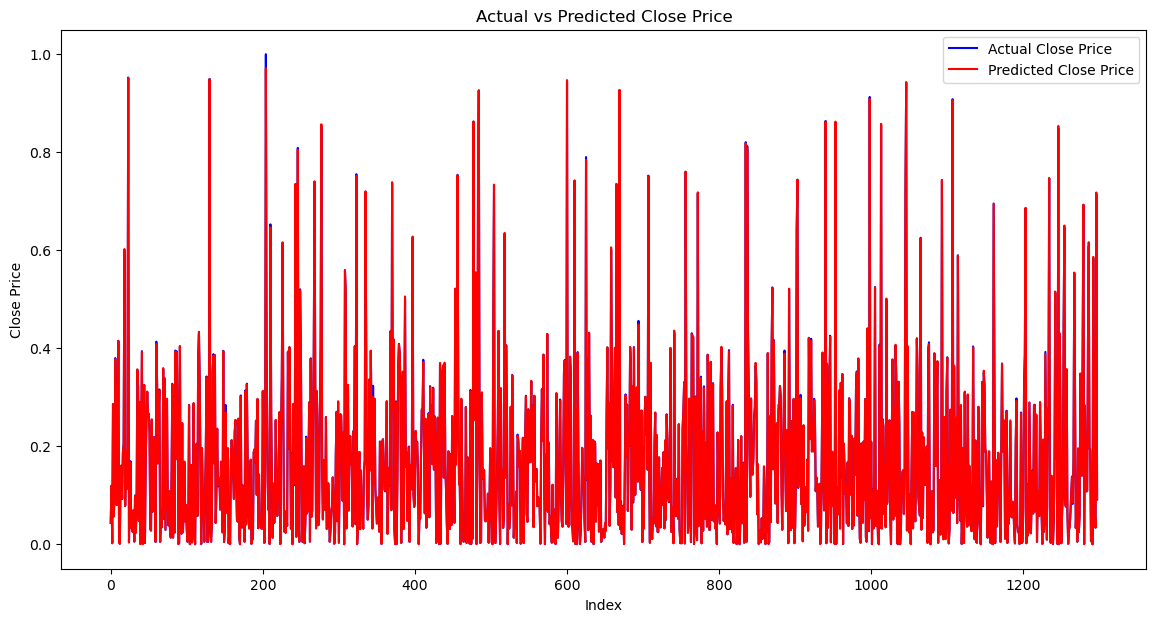

In [393]:
# Plot actual vs predicted close prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Close Price', color='b', linestyle='-')  # Line for actual values
plt.plot(y_pred, label='Predicted Close Price', color='r', linestyle='-')  # Line for predicted values
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

#### **Spliting Data into Train & Test**

In [ ]:
import numpy as np

# Assuming data_frame_scaled is already defined as a numpy array with shape (6487, 6)
data_frame_scaled = np.random.rand(6487, 6)  # This line is just an example for creating a dummy array

train_size = int(len(data_frame_scaled) * 0.9)
train, test = data_frame_scaled[:train_size], data_frame_scaled[train_size:]

print(train.shape, test.shape)

In [ ]:
# Separating 'Close' column from the rest of the data
train_data = train[:, :-1]  # All columns except the last one
train_close = train[:, -1].reshape(-1, 1)  # The last column

test_data = test[:, :-1]  # All columns except the last one
test_close = test[:, -1].reshape(-1, 1)  # The last column

# Scaling the data
rs_data = MinMaxScaler()
rs_target = MinMaxScaler()

train_data_scaled = rs_data.fit_transform(train_data)
train_close_scaled = rs_target.fit_transform(train_close)

test_data_scaled = rs_data.transform(test_data)
test_close_scaled = rs_target.transform(test_close)

# Combining the scaled data back
train_scaled = np.hstack((train_data_scaled, train_close_scaled))
test_scaled = np.hstack((test_data_scaled, test_close_scaled))

print(train_scaled.shape, test_scaled.shape)

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Define time_steps
time_steps = 5

# Separate the features and target from the scaled train and test sets
train_features = train_scaled[:, :-1]
train_close = train_scaled[:, -1]

test_features = test_scaled[:, :-1]
test_close = test_scaled[:, -1]

# Create datasets
x_train, y_train = create_dataset(train_features, train_close, time_steps)
x_test, y_test = create_dataset(test_features, test_close, time_steps)

print(x_train.shape, x_test.shape)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, Bidirectional, LSTM, Dropout, Dense

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5,
                 strides=1, padding="causal",
                 activation="relu",
                 input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Bidirectional(LSTM(units=500, return_sequences=True)))
model.add(Bidirectional(LSTM(units=500)))
model.add(Dropout(rate=0.25))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation="relu"))
model.add(Dense(units=1))
model.compile(loss=keras.losses.Huber(),  # You can use keras.losses.Huber() too
              optimizer='adam',
              metrics=["mse"])

# Print the model summary
model.summary()

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.35,
    shuffle=False,
    verbose=1
)

In [ ]:
# Predicting with the model
pred = model.predict(x_test)

# Reshape y_train and y_test for inverse transformation
y_train_inv = rs_target.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = rs_target.inverse_transform(y_test.reshape(-1, 1))

# Reshape predictions for inverse transformation
pred_inv = rs_target.inverse_transform(pred.reshape(-1, 1))

# Flatten the arrays for further use if needed
y_train_inv = y_train_inv.flatten()
y_test_inv = y_test_inv.flatten()
pred_inv = pred_inv.flatten()

In [ ]:
import matplotlib.pyplot as plt

# Plot the true and predicted values
plt.plot(y_test_inv, marker='.', label='True')
plt.plot(pred_inv, 'r', marker='.', label='Predicted')
plt.legend()
plt.show()


#### **Prepare Data for LSTM Model**

#### **Build & Compile LSTM Model**

#### **Predicting 'Close' price for the next day, next 7 days, and next 14 days** 

### **Old Approach**

#### **Creating Logic to Remember Previous 150 Records for LSTM**

In [ ]:
# Create sequences of 100 records
sequence_length = 150
x = []
y = []

for i in range(len(data_frame_scaled) - sequence_length):
    x.append(data_frame_scaled[i:i+sequence_length])
    y.append(data_frame_scaled[i+sequence_length, 0])  # Predicting the "Close" value

x = np.array(x)
y = np.array(y)

#### **Splitting Numpy Array in Train, Test Set**

In [ ]:
# Split data into training and testing sets
split = int(len(x) * 0.8)
x_train, x_test = x[:split], x[split:]      # from 0 till split, it goes to train and the rest goes to test
y_train, y_test = y[:split], y[split:]      # from 0 till split, it goes to train and the rest goes to test

In [ ]:
# viewing shape of x_train, x_test, y_train, y_test
print("x_train.shape", x_train.shape)
print("x_test.shape", x_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

### **XGBoost Regressor Model (Boosting Algorithm)**

In [ ]:
# loading the preprocessed data from "df_to_csv_final.csv"
data_file_path = os.path.join(config.BASE_DIR, 'dataset', 'df_to_csv_final.csv')
dataframe_xgboost = pd.read_csv(data_file_path)
dataframe_xgboost.sample(5)

In [ ]:
X_xg = dataframe_xgboost.drop(columns=['Close'])
y_xg = dataframe_xgboost['Close']

In [ ]:
# splitting the data frame into train, test
from sklearn.model_selection import train_test_split

X_xg_train, X_xg_test, y_xg_train, y_xg_test = train_test_split(X_xg, y_xg, test_size=0.2, random_state=42)

In [ ]:
# Using the XGBoost model
import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=50, learning_rate=0.05)

# Train the model
xgb_model.fit(X_xg_train, y_xg_train)

#### **Making the Prediction**

In [ ]:
# Make predictions
y_xg_pred = xgb_model.predict(X_xg_test)
y_xg_pred

In [ ]:
# Create the line chart
plt.figure(figsize=(10, 5))
plt.plot(y_xg_test, color='blue', label='Actual Values')
plt.plot(y_xg_pred, color='red', label='Predicted Values')

# Adding title and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')

# Adding legend
plt.legend()

# Display the chart
plt.show()

### **GRU (Gated Recurrent Unit) MODEL**

#### **Defining GRU Model for Stock Prediction**

In [ ]:
# creating GRU model using tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(sequence_length, x.shape[2])))
model_gru.add(GRU(units=50, return_sequences=True))
model_gru.add(GRU(units=50, return_sequences=False))
model_gru.add(Dense(units=1))

model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
model_gru.summary()

In [ ]:
# fitting the train data into model
history_gru = model_gru.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['mae'], label='Train MAE')
plt.plot(history_gru.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

#### **Saving The Model (Both Pickle and H5 File)**

In [ ]:
import pickle
import h5py

def save_model(model_gru, pickle_filename, h5_filename):
    # Save as pickle
    with open(pickle_filename, 'wb') as f:
        pickle.dump(model_gru, f)
    
    # Save as HDF5
    model_gru.save(h5_filename)

pickle_file_path_gru = os.path.join(config.BASE_DIR, 'models', 'model_gru.pkl')
h5_file_path_gru = os.path.join(config.BASE_DIR, 'models', 'model_gru.h5')

# Save the model
save_model(model_gru, pickle_file_path_gru, h5_file_path_gru)

#### **Load GRU Pickle Model**

In [ ]:
def load_model_from_pickle(pickle_file_path):
    with open(pickle_file_path, 'rb') as f:
        model = pickle.load(f)
    return model

# Load model from pickle file
model_gru_pickle = load_model_from_pickle(pickle_file_path_gru)

#### **Load GRU H5 Model**

In [ ]:
def load_model_from_h5(h5_file_path):
    return h5py.File(h5_file_path, 'r')

# Load model from HDF5 file
model_gru_h5 = load_model_from_h5(h5_file_path_gru)

#### **Making Predictions**

In [ ]:
# Make predictions
predictions = model_gru_pickle.predict(x_test)
predictions

In [ ]:
# Inverse the normalization if needed (assuming you have a scaler)
# predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
# y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the performance
plt.figure(figsize=(10, 8))
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### **Predict The Next Week Values**

In [ ]:
# viewing all the variables that we need to work with to predict the next value
print(x_test.shape)
print(y_test.shape)
print(predictions.shape)

In [ ]:
# Get the last sequence from the test data
last_sequence_gru = x_test[-1]  # shape (150, 3)

# Create an empty list to store the predicted values
predicted_stock_prices_gru = []

In [ ]:
# Predict the stock price for the next 30 days
for _ in range(365):
    # Reshape last_sequence to fit the model input shape (1, sequence_length, num_features)
    last_sequence_reshaped_gru = np.reshape(last_sequence_gru, (1, last_sequence_gru.shape[0], last_sequence_gru.shape[1]))
    
    # Predict the next stock price
    next_price_gru = model_gru.predict(last_sequence_reshaped_gru)
    
    # Append the predicted price to the predicted_stock_prices list
    predicted_stock_prices_gru.append(next_price_gru[0, 0])
    
    # Prepare the next input sequence
    # Remove the first element and add the new predicted price at the end
    new_element_gru = np.array([next_price_gru[0, 0], last_sequence_gru[-1, 1], last_sequence_gru[-1, 2]])  # assuming 3 features
    last_sequence_gru = np.vstack((last_sequence_gru[1:], new_element_gru))

# Convert predicted_stock_prices list to a numpy array
predicted_stock_prices_gru = np.array(predicted_stock_prices_gru)

print(predicted_stock_prices_gru)

In [ ]:
# Plot the actual test predictions and the predicted next 30 days
plt.figure(figsize=(15, 20))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Test Data')
plt.plot(range(len(y_test), len(y_test) + len(predicted_stock_prices_gru)), predicted_stock_prices_gru, color='red', label='Predicted Next 30 Days')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

### **LSTM MODEL**

#### **Defining LSTM (Long-Short-Term-Memory) Model for Stock Prediction**

In [ ]:
# creating lstm model using tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, x.shape[2])))
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# viewing the summary of the model
model_lstm.summary()

In [ ]:
# fitting the train data into model
history_lstm = model_lstm.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mae'], label='Train MAE')
plt.plot(history_lstm.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

#### **Saving The Model (Both Pickle and H5 File)**

In [ ]:
import pickle
import h5py

def save_model(model, pickle_filename, h5_filename):
    # Save as pickle
    with open(pickle_filename, 'wb') as f:
        pickle.dump(model, f)
    
    # Save as HDF5
    model.save(h5_filename)

pickle_file_path_lstm = os.path.join(config.BASE_DIR, 'models', 'model_lstm.pkl')
h5_file_path_lstm = os.path.join(config.BASE_DIR, 'models', 'model_lstm.h5')

# Save the model
save_model(model_lstm, pickle_file_path_lstm, h5_file_path_lstm)

#### **Load LSTM Pickle Model**

In [ ]:
def load_model_from_pickle(pickle_file_path):
    with open(pickle_file_path, 'rb') as f:
        model = pickle.load(f)
    return model

# Load model from pickle file
model_lstm_pickle = load_model_from_pickle(pickle_file_path_lstm)


#### **Load LSTM H5 Model**

In [ ]:
def load_model_from_h5(h5_file_path):
    return h5py.File(h5_file_path, 'r')

# Load model from HDF5 file
model_lstm_h5 = load_model_from_h5(h5_file_path_lstm)

#### **Making Predictions**

In [ ]:
# Make predictions
predictions_lstm = model_lstm_pickle.predict(x_test)
predictions_lstm

In [ ]:
# Inverse the normalization if needed (assuming you have a scaler)
# predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
# y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the performance
plt.figure(figsize=(10, 8))
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(predictions_lstm, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### **Predict The Next Week Values**

In [ ]:
# viewing all the variables that we need to work with to predict the next value
print(x_test.shape)
print(y_test.shape)
print(predictions_lstm.shape)

In [ ]:
# Get the last sequence from the test data
last_sequence_lstm = x_test[-1]  # shape (150, 3)

# Create an empty list to store the predicted values
predicted_stock_prices_lstm = []

In [ ]:
# Predict the stock price for the next 30 days
for _ in range(365):
    # Reshape last_sequence to fit the model input shape (1, sequence_length, num_features)
    last_sequence_reshaped_lstm = np.reshape(last_sequence_lstm, (1, last_sequence_lstm.shape[0], last_sequence_lstm.shape[1]))
    
    # Predict the next stock price
    next_price_lstm = model_lstm.predict(last_sequence_reshaped_lstm)
    
    # Append the predicted price to the predicted_stock_prices list
    predicted_stock_prices_lstm.append(next_price_lstm[0, 0])
    
    # Prepare the next input sequence
    # Remove the first element and add the new predicted price at the end
    new_element_lstm = np.array([next_price_lstm[0, 0], last_sequence_lstm[-1, 1], last_sequence_lstm[-1, 2]])  # assuming 3 features
    last_sequence_lstm = np.vstack((last_sequence_lstm[1:], new_element_lstm))

# Convert predicted_stock_prices list to a numpy array
predicted_stock_prices_lstm = np.array(predicted_stock_prices_lstm)

print(predicted_stock_prices_lstm)

In [ ]:
# Plot the actual test predictions and the predicted next 30 days
plt.figure(figsize=(15, 20))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Test Data')
plt.plot(range(len(y_test), len(y_test) + len(predicted_stock_prices_lstm)), predicted_stock_prices_lstm, color='red', label='Predicted Next 30 Days')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()